In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import regex as re
import seaborn as sns
import mysql.connector
%matplotlib inline

# Densidad del tráfico en ciudades
Este dataset proporciona una vista detallada de los datos de tráfico en un entorno urbano futurista y contiene más de 1,2 millones de registros. Cada registro representa una instantánea única de varios factores que afectan las condiciones del tráfico en seis ciudades ficticias.

## Objetivo del dataset
El objetivo principal de este dataset es proporcionar una visión detallada y completa del tráfico urbano en un entorno futurista. Al combinar datos de diversas fuentes y factores, se busca entender y modelar la complejidad del tráfico en ciudades inteligentes.

In [2]:
# Importar el csv
df_fct = pd.read_csv("./futuristic_city_traffic.csv")

In [3]:
# Mostrar información sobre los tipos de datos y valores faltantes
df_fct.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1219567 entries, 0 to 1219566
Data columns (total 11 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   City                   1219567 non-null  object 
 1   Vehicle Type           1219567 non-null  object 
 2   Weather                1219567 non-null  object 
 3   Economic Condition     1219567 non-null  object 
 4   Day Of Week            1219567 non-null  object 
 5   Hour Of Day            1219567 non-null  int64  
 6   Speed                  1219567 non-null  float64
 7   Is Peak Hour           1219567 non-null  int64  
 8   Random Event Occurred  1219567 non-null  int64  
 9   Energy Consumption     1219567 non-null  float64
 10  Traffic Density        1219567 non-null  float64
dtypes: float64(3), int64(3), object(5)
memory usage: 102.4+ MB


Tamaño del Dataset: 1,219,567 entradas es un conjunto de datos considerable, lo que permite realizar análisis estadísticos robustos y obtener resultados significativos.

Tipos de datos: 
* Variables categóricas (object): Ciudad, Tipo de Vehículo, Clima, Condición económica, Día de la semana. Estas variables son fundamentales para segmentar y comparar el tráfico en diferentes contextos. El hecho de que no haya valores nulos en estas variables facilita el análisis y evita la necesidad de imputación.
* Variables numéricas: Hora del día (Int), Velocidad (Float), Consumo de energía (Float), Densidad de tráfico (Float). Estas variables son esenciales para el análisis cuantitativo y la modelización del tráfico. La ausencia de valores nulos en estas variables también es una ventaja, ya que permite realizar cálculos y análisis sin preocuparse por la falta de datos.
* Variables booleanas: Es hora pico, Ocurrió un evento aleatorio. Estas variables son útiles para identificar patrones y eventos específicos que pueden influir en el tráfico. Que sean variables de tipo entero o booleano (1,0) facilitan su análisis.

In [4]:
# Mostrar las primeras 10 filas del dataset
df_fct.head(10)

,City,Vehicle Type,Weather,Economic Condition,Day Of Week,Hour Of Day,Speed,Is Peak Hour,Random Event Occurred,Energy Consumption,Traffic Density
0,SolarisVille,Drone,Snowy,Stable,Sunday,20,29.4268,0,0,14.7134,0.5241
1,AquaCity,Flying Car,Solar Flare,Recession,Wednesday,2,118.8000,0,0,143.5682,0.3208
2,Neuroburg,Autonomous Vehicle,Solar Flare,Recession,Wednesday,16,100.3904,0,0,91.2640,0.0415
3,Ecoopolis,Drone,Clear,Booming,Thursday,8,76.8000,1,0,46.0753,0.1811
4,AquaCity,Autonomous Vehicle,Solar Flare,Stable,Saturday,16,45.2176,0,0,40.1934,0.4544
5,TechHaven,Autonomous Vehicle,Snowy,Recession,Thursday,20,30.5179,0,0,37.5562,0.0843
6,Ecoopolis,Autonomous Vehicle,Rainy,Recession,Monday,21,43.9222,0,0,39.0420,0.0293
7,Ecoopolis,Autonomous Vehicle,Snowy,Stable,Friday,20,20.4236,0,0,18.1543,0.1393
8,MetropolisX,Drone,Snowy,Recession,Saturday,7,69.9735,0,0,41.8502,0.1505
9,SolarisVille,Drone,Snowy,Booming,Saturday,15,37.9431,0,0,18.9715,0.2485


In [5]:
# Mostrar estadísticas descriptivas de las columnas
df_fct.describe().round(3)

,Hour Of Day,Speed,Is Peak Hour,Random Event Occurred,Energy Consumption,Traffic Density
count,1219567.000,1219567.000,1219567.000,1219567.000,1219567.000,1219567.000
mean,11.508,59.945,0.155,0.050,49.465,0.277
std,6.919,26.632,0.362,0.218,25.280,0.219
min,0.000,6.693,0.000,0.000,4.930,0.006
25%,6.000,37.533,0.000,0.000,29.274,0.106
50%,12.000,58.471,0.000,0.000,45.783,0.219
75%,17.000,80.535,0.000,0.000,65.906,0.396
max,23.000,163.089,1.000,1.000,189.949,3.378


In [6]:
# Observar el valor máximo, mínimo y la media de cada columna
for col in df_fct.select_dtypes(include=np.number).columns:
        promedio = np.mean(df_fct[col].values).round(3)
        max = np.max(df_fct[col].values).round(3)
        min = np.min(df_fct[col].values).round(3)
        print(f"Columna: {col}, Media: {promedio}, Max: {max}, Min: {min}")

Columna: Hour Of Day, Media: 11.508, Max: 23, Min: 0
Columna: Speed, Media: 59.945, Max: 163.089, Min: 6.693
Columna: Is Peak Hour, Media: 0.155, Max: 1, Min: 0
Columna: Random Event Occurred, Media: 0.05, Max: 1, Min: 0
Columna: Energy Consumption, Media: 49.465, Max: 189.949, Min: 4.93
Columna: Traffic Density, Media: 0.277, Max: 3.378, Min: 0.006


### Análisis de estadísticas descriptivas
Hora del día:
* Promedio (11.081): El promedio de la hora del día está cerca del mediodía, dando a entender que los datos están distribuidos relativamente uniformemente a lo largo del día.
* Desviación estándar (6.919): La desviación estándar es relativamente alta, lo que indica que los datos están dispersos a lo largo de las 24 horas del día.
* Distribución: Los cuartiles (25%, 50%, 75%) muestran una distribución bastante uniforme, lo que respalda la idea de que los datos cubren todo el rango de horas del día.

Velocidad:
* Promedio (59.945): La velocidad promedio es de aproximadamente 60 unidades (KM/H o M/H).
* Desviación estándar (26.632): La desviación estándar es alta, lo que indica una gran variabilidad en las velocidades registradas.
* Rango: El rango es amplio (6.693 a 163.089), lo que sugiere que hay una gran variedad de condiciones de velocidad, desde tráfico lento hasta velocidades muy altas.

Es hora pico:
* Promedio (0.155): Solo es 15.47% de los registros se realizaron durante las horas pico. Esto indica que la mayoría de los datos corresponden a períodos fuera de las horas pico.

Ocurrió un evento aleatorio:
* Promedio (0.050): Solo es 4.99% de los registros incluyen la ocurrencia de un evento aleatorio. Esto sugiere que los eventos aleatorios son relativamente infrecuentes.

Consumo de energía: 
* Promedio (49.465): El consumo de energía promedio es de 49.46 unidades (Pueden ser kWh).
* Desviación estándar (25.280): La desviación estándar es alta, lo que indica una gran cantidad de variabilidad en el consumo de energía.
* Relación con velocidad: La alta desviación estándar en la velocidad se refleja en el consumo de energía.

Densidad de tráfico: 
* Promedio (0.277): La densidad de tráfico promedio es relativamente baja.
* Desviación estándar (0.219): La desviación estándar es relativamente alta en comparación con el promedio, indicando una variabilidad significativa en la densidad del tráfico.
* Rango: Rango amplio (0.006 a 3.378), sugiriendo que hay una gran variedad de condiciones de tráfico, desde tráfico muy ligero hasta tráfico muy denso.asta tráfico muy denso.


In [7]:
# Calcular la media de la densidad del tráfico por hora del día
densidad_trafico_hora = df_fct.groupby('Hour Of Day')['Traffic Density'].mean()
print("Media de la densidad de tráfico por hora del día:\n", densidad_trafico_hora)

Media de la densidad de tráfico por hora del día:
 Hour Of Day
0     0.279036
1     0.278362
2     0.279442
3     0.280975
4     0.279912
5     0.280407
6     0.282603
7     0.291232
8     0.293579
9     0.280921
10    0.272151
11    0.273186
12    0.277073
13    0.268148
14    0.271075
15    0.265894
16    0.264882
17    0.284771
18    0.283521
19    0.271819
20    0.273105
21    0.274475
22    0.271556
23    0.272486
Name: Traffic Density, dtype: float64


# Variación a lo largo del día

Se observa que la densidad del tráfico varía a lo largo del día, aunque las variaciones no son extremadamente amplias. Los valores más altos de densidad tienden a concentrarse en las horas pico, particularmente alrededor de las 7:00, 8:00 y las 17:00 y 18:00. Esto es consistente con los patrones típicos de tráfico en áreas urbanas, donde la gente se desplaza hacia y desde el trabajo. Las horas con menor densidad de tráfico son generalmente las nocturnas y las primeras horas de la mañana.

En general, los valores de densidad se mantienen relativamente bajos (alrededor de 0.2). Esto podría indicar que la zona analizada no experimenta congestión severa, o que los datos representan un promedio de condiciones de tráfico variables.

Las horas pico identificadas (7:00-8:00 y 17:00-18:00) son momentos clave para la planificación de rutas y la gestión del tráfico. En estas horas, es probable que se experimenten mayores tiempos de viaje y posibles retrasos.

Aunque hay variaciones, la densidad del tráfico se mantiene relativamente estable durante la mayor parte del día. Esto podría indicar un flujo de tráfico constante, aunque no necesariamente intenso.

In [8]:
# Calcular la desviación estándar de la densidad de tráfico por hora del día
traffic_density_std_by_hour = df_fct.groupby('Hour Of Day')['Traffic Density'].std()
print("Desviación estándar de la densidad de tráfico por hora del día:\n", traffic_density_std_by_hour)

Desviación estándar de la densidad de tráfico por hora del día:
 Hour Of Day
0     0.215709
1     0.214914
2     0.217379
3     0.215728
4     0.216412
5     0.217428
6     0.220543
7     0.234074
8     0.235235
9     0.219077
10    0.208830
11    0.209150
12    0.213442
13    0.215853
14    0.218930
15    0.210240
16    0.210981
17    0.234041
18    0.232948
19    0.219275
20    0.217763
21    0.219192
22    0.217524
23    0.218192
Name: Traffic Density, dtype: float64


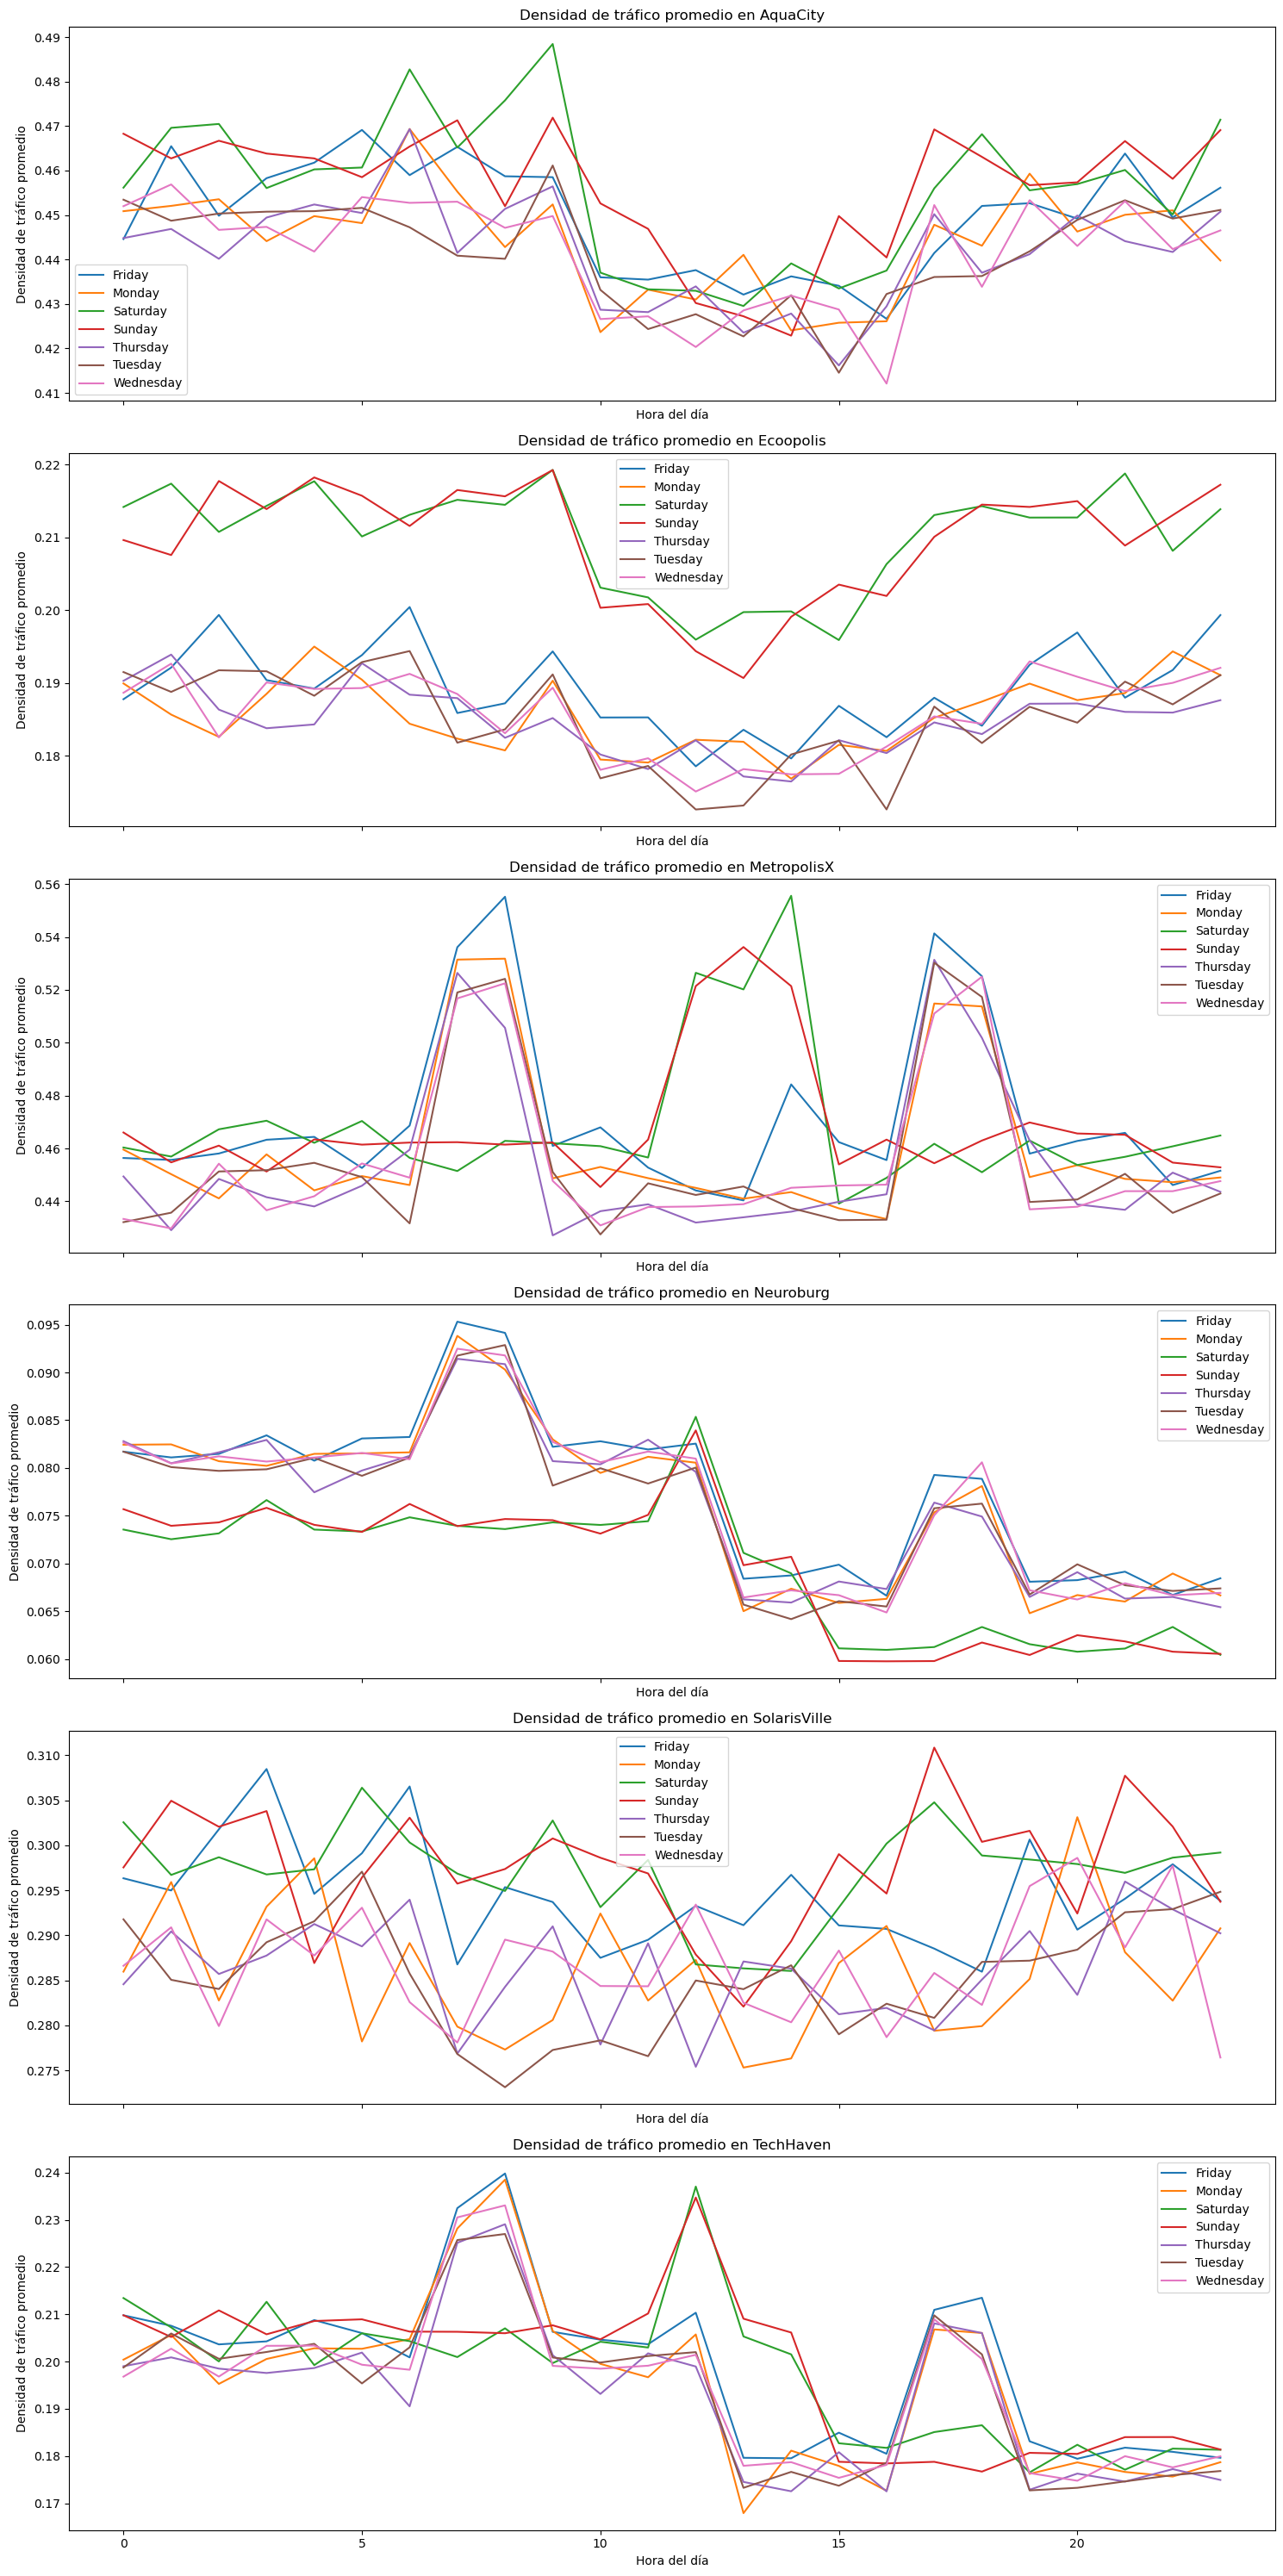

In [9]:
# Gráficos de series de tiempo para visualizar la densidad del tráfico promedio
densidad_trafico_promedio = df_fct.groupby(['City', 'Day Of Week', 'Hour Of Day'])['Traffic Density'].mean().reset_index()
fig, axes = plt.subplots(len(densidad_trafico_promedio['City'].unique()), 1, figsize=(15, 5 * len(densidad_trafico_promedio['City'].unique())), sharex=True)
for i, city in enumerate(densidad_trafico_promedio['City'].unique()):
    for day in densidad_trafico_promedio['Day Of Week'].unique():
        hora_dia_ciudad = densidad_trafico_promedio[(densidad_trafico_promedio['City'] == city) & (densidad_trafico_promedio['Day Of Week'] == day)].sort_values('Hour Of Day')
        if not hora_dia_ciudad.empty: # Verifica si hay datos para la combinación ciudad-día
            axes[i].plot(hora_dia_ciudad['Hour Of Day'], hora_dia_ciudad['Traffic Density'], label=day)
    axes[i].set_title(f'Densidad de tráfico promedio en {city}')
    axes[i].set_xlabel('Hora del día')
    axes[i].set_ylabel('Densidad de tráfico promedio')
    axes[i].legend()
plt.tight_layout()
plt.show()

## Análisis comparativo de las 6 ciudades
### Densidad del tráfico general:
* Neuroburg: Presenta la densidad de tráfico promedio más baja de todas las ciudades, con valores que oscilan entre 0.06 y 0.095. Esto indica un sistema de tráfico muy eficiente y con misma congestión.
* Ecoopolis y TechHaven: Muestran una densidad de tráfico moderada, con valores que oscilan entre 0.17 y 0.24 para TechHaven, y entre 0.18 y 0.22 para Ecoopolis, respectivamente. Esto sugiere que estas ciudades tienen sistemas de tráfico relativamente estables y con congestión moderada durante las horas pico.
* SolarisVille: Tiene una densidad de tráfico ligeramente mayor que Ecoopolis y TechHaven, con valores que oscilan entre 0.275 y 0.310. Indicando una congestión moderada, similar a las ciudades anteriores.
* AquaCity: Presenta una densidad de tráfico más alta, con valores que oscilan entre 0.42 y 0.49. Esto sugiere que AquaCity tiene un sistema de tráfico más congestionado en comparación a las ciudades anteriores.
* MetropolisX: Muestra la densidad de tráfico más alta y la mayor variabilidad de todas las ciudades, con valores que oscilan entre 0.44 y 0.56 y picos muy pronunciados. Esto indica un sistema de tráfico muy congestionado y propenso a fluctuaciones bruscas.

### Patrones diarios:
Todas las ciudades muestran patrones diarios típicos, con picos de tráficos durante las horas pico de la mañana y la tarde, y una disminución significativa durante la noche y las primeras horas de la mañana. Sin embargo, la magnitud de los picos y la variabilidad varían significativamente entre las ciudades. MetropolisX muestra los picos más altos y la mayor variabilidad, mientras que Neuroburg muestra picos más suaves y la menor variabilidad.

### Variabilidad:
* MetropolisX: Presenta la mayor variabilidad en la densidad del tráfico, lo que indica un sistema de tráfico muy dinámico y propenso a cambios bruscos.
* AquaCity: Muestra una variabilidad moderada, con fluctuaciones notables a lo largo del día.
* Ecoopolis, TechHaven y SolarisVille: Presentan una variabilidad moderada, con fluctuaciones notables a lo largo del día, pero menos pronunciadas que en AquaCity.
* Neuroburg: Presenta la menor variabilidad, lo que indica que el tráfico muy estable y menos propenso a fluctuaciones bruscas.

### Comparación entre días de la semana:
Todas las ciudades muestran patrones diferentes entre los días laborales y fines de semana. Los días laborales tienden a mostrar picos de tráfico más pronunciados durante las horas pico, mientras que los fines de semana muestran patrones más uniformes. El día domingo es el que presenta la menor densidad de tráfico en todas las ciudades.

### Anomalías:
Todas las ciudades muestran algunos picos y caídas inusuales, pero son más pronunciados en MetropolisX y AquaCity, estos picos y caídas pueden indicar eventos específicos o anomalías en los datos, pero su impacto es menor en las ciudades con menor variabilidad.   .s.ana:



In [10]:
# Calcular la densidad de tráfico promedio en diferentes condiciones climáticas
trafico_clima = df_fct.groupby('Weather')['Traffic Density'].mean()
print("Densidad de tráfico promedio en diferentes condiciones climáticas:\n", trafico_clima)

Densidad de tráfico promedio en diferentes condiciones climáticas:
 Weather
Clear                    0.295877
Electromagnetic Storm    0.291038
Rainy                    0.267690
Snowy                    0.268190
Solar Flare              0.262726
Name: Traffic Density, dtype: float64


## Análisis de la densidad de tráfico promedio por condiciones climáticas
* Despejado: La densidad de tráfico promedio es la más alta (0.295877). Esto sugiere que cuando el clima es favorable, hay más vehículos en las calles, resultando en más tráfico.
* Tormenta electromagnética: La densidad de tráfico promedio es ligeramente menor (0.291038). Aunque la diferencia no es muy grande, sugiere que las tormentas electromagnéticas pueden disuadir ligeramente a algunos conductores de salir.
* Lluvioso y nevado: La densidad de tráfico promedio es significativamente menor en condiciones lluviosas (0.267690) y nevadas (0.268190). Esto indica que las condiciones climáticas adversas, como la lluvia y la nieve, reducen la densidad del tráfico. Esto es lógico, ya que los conductores pueden ser más cautelosos y evitar salir en estas condiciones.
* Llamarada solar: La densidad de tráfico promedio es la más baja (0.262726) en estas condiciones. Esto sugiere que las llamaradas solares tienen el mayor impacto en la reducción de la densidad del tráfico.
### Implicaciones y observaciones clave
* Impacto del clima: El clima tiene un impacto significativo en la densidad del tráfico. Las condiciones climáticas adversas, como la lluvia, la nieve y las llamaradas solares, reducen la densidad del tráfico.
* Comportamiento de los conductores: Los datos sugieren que los conductores son más propensos a evitar salir a la carretera en condiciones climáticas adversas.
* Planificación del tráfico: Esta información puede ser útil para planificar el tráfico y la congestión.

In [11]:
# Calcular la densidad de tráfico promedio en diferentes condiciones económicas
densidad_trafico_economia = df_fct.groupby('Economic Condition')['Traffic Density'].mean()
print("Densidad de tráfico promedio en diferentes condiciones económicas:\n", densidad_trafico_economia)

Densidad de tráfico promedio en diferentes condiciones económicas:
 Economic Condition
Booming      0.354615
Recession    0.129391
Stable       0.347305
Name: Traffic Density, dtype: float64


## Análisis de la densidad del tráfico promedio por condiciones económicas
* Auge económico (Booming): La densidad del tráfico promedio es la más alta (0.354615) en estas condiciones. Esto sugiere que cuando la economía está en auge, hay más actividad comercial y más personas se desplazan, resultando en una mayor densidad de tráfico.
* Recesión económica: La densidad de tráfico promedio es significativamente menor (0.129391). Esto indica que durante la recesión, hay menos actividad económica y menos personas se desplazan, resultando en una densidad de tráfico promedio mucho menor.
* Economía estable: La densidad de tráfico promedio (0.347305) es muy similar a la del auge. Esto sugiere que incluso en condiciones de estabilidad, hay una alta actividad económica y alta demanda en transporte.
### Implicaciones y observaciones clave
* Impacto de la economía: La economía tiene un impacto significativo en la densidad del tráfico. Los auges económicos y la economía estable se asocian con una mayor densidad de tráfico, mientras que las recesiones se asocian con una menor densidad de tráfico.
* Comportamiento de los conductores: Los datos sugieren que los conductores son más propensos a desplazarse durante los auges económicos y la estabilidad, y menos propensos durante las recesiones.
* Planificación del tráfico: Esta información puede ser útil para planificar y gestionar el tráfico.

In [12]:
# Comparar la densidad de tráfico en días laborables vs. fines de semana
df_fct['Finde'] = df_fct['Day Of Week'].isin(['Saturday', 'Sunday'])
densidad_trafico_finde = df_fct.groupby('Finde')['Traffic Density'].mean()
print("Densidad de tráfico promedio en días laborables vs. fines de semana:\n", densidad_trafico_finde)

Densidad de tráfico promedio en días laborables vs. fines de semana:
 Finde
False    0.274575
True     0.283412
Name: Traffic Density, dtype: float64


## Análisis de la densidad del tráfico promedio (Días laborales vs. Fines de Semana)
* Días laborales: La densidad de tráfico promedio es de 0.274575
* Fines de semana: La densidad de tráfico promedio es de 0.283412
### Observaciones clave
* Mayor tráfico los fines de semana: La densidad de tráfico promedio es ligeramente mayor en fines de semana que en días laborales. Esto puede deberse a varios factores, como mayor número de actividades de ocio, compras o viajes durante los fines de semana.
### Implicaciones
* Patrones de tráfico no lineales: Estos datos sugieren que los patrones de tráfico no son simplemente una cuestión de días laborales o fines de semana. Otros factores, como hora del día, condiciones climáticas y económicas, también influyen en la densidad del tráfico.
* Planificación de movilidad: Las autoridades y planificadores urbanos deben tener en cuenta estos patrones al diseñar estrategias de gestión de tráfico.
* Actividades de ocio: La información recabada nos indica que las actividades de ocio aumentan durante los fines de semana, creando un aumento en el tráfico.

In [13]:
# Calcular la velocidad promedio de diferentes tipos de vehículos
promedio_velocidad_tipo_vehiculo = df_fct.groupby('Vehicle Type')['Speed'].mean()
print("Velocidad promedio de diferentes tipos de vehículos:\n", promedio_velocidad_tipo_vehiculo)

Velocidad promedio de diferentes tipos de vehículos:
 Vehicle Type
Autonomous Vehicle    59.975762
Car                   59.839225
Drone                 60.619232
Flying Car            57.143722
Name: Speed, dtype: float64


## Análisis de velocidad promedio por tipo de vehículo
* Vehículo autónomo: La velocidad promedio de los vehículos autónomos es de 59.975762 unidades. Esto sugiere que los vehículos autónomos mantienen una velocidad constante y eficiente.
* Automóvil: La velocidad promedio de los automóviles es de 59.839225 unidades. Esta velocidad es muy similar a la de los vehículos autónomos, indicando que ambos tipos de vehículos mantienen velocidades comparables.
* Dron: La velocidad promedio de los drones es la más alta 60.619232 unidades. Esto sugiere que los drones pueden desplazarse a velocidades más altas debido a su capacidad de vuelo y posiblemente la menor congestión en el aire.
* Automóvil volador:La velocidad promedio de los automóviles voladores es la más baja 57.143722 unidades. Esto podría deberse a varios factores como restricciones de velocidad o limitaciones tecnológicas.

### Implicaciones y observaciones clave
* Variabilidad de la velocidad: La velocidad promedio varía significativamente entre los diferentes tipos de vehículos. Los drones son los más rápidos, seguidos por los vehículos autónomos y automóviles, mientras que los automóviles voladores son los más lentos.
* Tecnología y congestión: La diferencia en la velocidad promedio puede reflejar diferencias en la tecnología y congestión en diferentes modos de transporte. Los drones, al volar, pueden evitar congestión terrestre y alcanzar velocidades más altas por su tamaño más compacto.

In [14]:
# Calcular el consumo de energía promedio de diferentes tipos de vehículos
promedio_consumo_energia_vehiculo = df_fct.groupby('Vehicle Type')['Energy Consumption'].mean()
print("Consumo de energía promedio de diferentes tipos de vehículos:\n", promedio_consumo_energia_vehiculo)

Consumo de energía promedio de diferentes tipos de vehículos:
 Vehicle Type
Autonomous Vehicle    52.430057
Car                   62.569347
Drone                 32.973153
Flying Car            71.741685
Name: Energy Consumption, dtype: float64


## Análisis del consumo de energía promedio por tipo de vehículo
* Vehículo autónomo: El consumo de energía promedio de los vehículos autónomos es de 54.430057 unidades. Esto sugiere que los vehículos autónomos tienen un consumo de energía moderado.
* Automóvil: El consumo de energía promedio de los automóviles es de 62.569347 unidades. Indicando que los automóviles tienen un consumo más alto que los vehículos autónomos.
* Dron: El consumo de energía promedio de los automóviles es de 32.973153 unidades, siendo el más bajo. Esto sugiere que los drones son el método de transporte más eficiente energéticamente.
* Automóvil volador: El consumo de energía promedio de los automóviles voladores es el más alto 71.741685 unidades. Esto puede deberse a la mayor energía requerida para el vuelo y propulsión.

### Implicaciones y observaciones clave
* Eficiencia energética: La eficiencia energética varía significativamente entre los diferentes tipos de vehículos. Los drones son los más eficientes, seguido por los vehículos autónomos y automóviles, mientras que los automóviles voladores son los menos eficientes.
* Tecnología: La diferencia en el consumo de energía puede reflejar diferencias en la tecnología de los diferentes métodos de transporte. Los drones, al ser más ligeros, tienen menor consumo de energía; los automóviles voladores, al requerir más energía para el vuelo, tienen mayor consumo de energía.
* Sostenibilidad: Esta información es crucial para evaluar la sostenibilidad de los diferentes modos de transporte. Los drones pueden ser una opción más sostenible para el transporte de las ciudades.

In [15]:
# Calcular la densidad de tráfico promedio cuando ocurre un evento aleatorio
densidad_trafico_evento_aleatorio = df_fct[df_fct['Random Event Occurred'] == 1]['Traffic Density'].mean().round(5)
print("Densidad de tráfico promedio cuando ocurre un evento aleatorio:", densidad_trafico_evento_aleatorio)
densidad_trafico_sin_evento_aleatorio = df_fct[df_fct['Random Event Occurred'] == 0]['Traffic Density'].mean().round(5)
print("Densidad de tráfico promedio cuando ocurre un evento aleatorio:", densidad_trafico_sin_evento_aleatorio)

Densidad de tráfico promedio cuando ocurre un evento aleatorio: 0.27722
Densidad de tráfico promedio cuando ocurre un evento aleatorio: 0.27709


## Análisis de la densidad de tráfico promedio con evento aleatorio
* Densidad de tráfico promedio cuando ocurre un evento aleatorio: 0.27722
* Densidad de tráfico promedio sin evento aleatorio: 0.27709
### Observaciones clave
* Impacto de eventos aleatorios: Este valor nos da una idea del impacto que tienen los eventos aleatorios (Accidentes, cierres de carreteras, desastres, etc.) en el flujo del tráfico.
* Diferencia mínima: La diferencia entre ambos cálculos es muy pequeña. Ambos valores son casi idénticos. Es poco probable que esta diferencia tenga un impacto significativo en el tráfico.

In [16]:
# Identificar las horas pico en cada ciudad
horas_pico = df_fct.groupby(['City', 'Hour Of Day'])['Traffic Density'].mean().groupby(level=0).idxmax()
print("Horas pico en cada ciudad:\n", horas_pico)

Horas pico en cada ciudad:
 City
AquaCity            (AquaCity, 6)
Ecoopolis         (Ecoopolis, 23)
MetropolisX      (MetropolisX, 8)
Neuroburg          (Neuroburg, 7)
SolarisVille    (SolarisVille, 3)
TechHaven          (TechHaven, 8)
Name: Traffic Density, dtype: object


### Observaciones
* Variabilidad: Las horas pico varían significativamente entre las ciudades. La mayoría de ciudades tienen horas pico en la mañana, pero Ecoopolis tiene una hora pico muy inusual al final del día, y SolarisVille muy temprano por la madrugada.
* Posibles explicaciones: Las diferencias entre las horas pico pueden deberse a diferentes patrones de trabajo y horarios escolares, diferentes actividades comerciales y de ocio, diferencias en infraestructura y transporte.

In [17]:
# Comparar la densidad de tráfico promedio entre diferentes ciudades
densidad_trafico_ciudad = df_fct.groupby('City')['Traffic Density'].mean()
print("Densidad de tráfico promedio entre diferentes ciudades:\n", densidad_trafico_ciudad)

Densidad de tráfico promedio entre diferentes ciudades:
 City
AquaCity        0.447340
Ecoopolis       0.192789
MetropolisX     0.461818
Neuroburg       0.074413
SolarisVille    0.290551
TechHaven       0.195952
Name: Traffic Density, dtype: float64


### Observaciones
* Variabilidad: La densidad de tráfico promedio varía significativamente entre las ciudades. MetropolisX y AquaCity tienen densidades más altas, seguidas por SolarisVille, TechHaven, Ecoopolis y Neuroburg con la densidad más baja.
* Posibles explicaciones: Diferencias en infraestructura y transporte, diferentes patrones de trabajo y horarios escolares, diferencia en la densidad de población de cada ciudad.

In [18]:
# Tabla de Resumen de tráfico por hora
trafico_por_hora = df_fct.groupby(['City', 'Hour Of Day']).agg(
    {'Traffic Density': 'mean', 'Speed': 'mean', 'Energy Consumption': 'mean'}
).reset_index()
print("Tabla de Resumen de tráfico por hora:\n", trafico_por_hora)

Tabla de Resumen de tráfico por hora:
           City  Hour Of Day  Traffic Density      Speed  Energy Consumption
0     AquaCity            0         0.452909  59.353090           47.855842
1     AquaCity            1         0.457509  59.035823           47.440928
2     AquaCity            2         0.453943  59.018168           47.566404
3     AquaCity            3         0.452900  59.086025           47.602994
4     AquaCity            4         0.454174  58.869970           47.311900
..         ...          ...              ...        ...                 ...
139  TechHaven           19         0.176961  56.080657           47.318728
140  TechHaven           20         0.177909  55.769334           46.882458
141  TechHaven           21         0.178389  56.401168           47.502421
142  TechHaven           22         0.179022  54.158515           47.606669
143  TechHaven           23         0.178963  54.204515           47.463532

[144 rows x 5 columns]


In [19]:
# Tabla comparativa de tráfico por ciudad
trafico_por_ciudad = df_fct.groupby('City').agg(
    {'Traffic Density': ['mean', lambda x: x[df_fct['Is Peak Hour'] == 1].mean()],
    'Speed': ['mean', 
              lambda x: x[df_fct['Vehicle Type'] == 'Autonomous Vehicle'].mean(), 
              lambda x: x[df_fct['Vehicle Type'] == 'Car'].mean(),
              lambda x: x[df_fct['Vehicle Type'] == 'Drone'].mean(),
              lambda x: x[df_fct['Vehicle Type'] == 'Flying Car'].mean()]}
).reset_index()
trafico_por_ciudad.columns = ['Ciudad', 'Densidad de tráfico (Promedio)', 'Densidad de tráfico (Promedio Hora Pico)',
                                 'Velocidad (Promedio General)', 'Velocidad (Promedio Vehículo Autónomo)', 'Velocidad (Promedio Autmóvil)',
                                 'Velocidad (Promedio Dron)', 'Velocidad (Promedio Automóvil Volador)']
print("Tabla comparativa de tráfico por ciudad:\n", trafico_por_ciudad)

Tabla comparativa de tráfico por ciudad:
          Ciudad  Densidad de tráfico (Promedio)  \
0      AquaCity                        0.447340   
1     Ecoopolis                        0.192789   
2   MetropolisX                        0.461818   
3     Neuroburg                        0.074413   
4  SolarisVille                        0.290551   
5     TechHaven                        0.195952   

   Densidad de tráfico (Promedio Hora Pico)  Velocidad (Promedio General)  \
0                                  0.442628                     58.139512   
1                                  0.187418                     57.132359   
2                                  0.525301                     62.655382   
3                                  0.082405                     60.747438   
4                                  0.283469                     65.100706   
5                                  0.218260                     55.909863   

   Velocidad (Promedio Vehículo Autónomo)  Velocidad (Promed

## Análisis tabla comparativa de tráfico por ciudad
### Densidad de tráfico (Promedio general):
* MetropolisX: Tiene la densidad de tráfico promedio más alta (0.461818), confirmando que es la ciudad con mayor congestión.
* AquaCity: Le sigue de cerca con 0.447340
* SolarisVille: Tiene una densidad moderada 0.290551
* TechHaven y Ecoopolis: Tienen densidades bajas y similares.
* Neuroburg: Tiene la densidad más baja 0.074413, indicando congestión mínima.
### Densidad de tráfico (Promedio hora pico):
Los valores siguen el mismo patrón que la densidad general, pero con algunas diferencias notables:
* MetropolisX: Tiene el valor más alto 0.525301, confirmando que las horas pico son extremadamente congestionadas.
* Neuroburg: Muestra el valor más bajo 0.082405, indicando que incluso durante las horas pico, la congestión es mínima.
### Velocidad (Promedio general):
* SolarisVille: Tiene la velocidad promedio más alta 65.100706, sugiere un flujo de tráfico más rápido.
* MetropolisX y Neuroburg: Tienen velocidades promedio relativamente altas.
* TechHaven y Ecoopolis: Tienen las velocidades promedio más bajas, indicando una mayor congestión o limitaciones de velocidad.
* AquaCity: Velocidad promedio moderada.
### Velocidad (Promedio tipos de vehículos):
La velocidad promedio varía significativamente entre los diferentes tipos de vehículos en cada ciudad.
### Observaciones
* Factores influyentes: Las diferencias de velocidad promedio pueden deberse a: Diferencias en infraestructura vial, algoritmos de conducción, condiciones de tráfico de cada ciudad, regulaciones de tránsito locales.
* Correlación inversa: En general, se observa una correlación inversa entre la densidad de tráfico y la velocidad promedio. Las ciudades con mayor densidad promedio tienden a tener velocidades más bajas.

In [20]:
# Tabla de impacto de factores externos
impacto_trafico = df_fct.groupby(['Weather', 'Economic Condition', 'Day Of Week'])['Traffic Density'].mean().reset_index()
print("Tabla de impacto de factores externos:\n", impacto_trafico)

Tabla de impacto de factores externos:
          Weather Economic Condition Day Of Week  Traffic Density
0          Clear            Booming      Friday         0.385000
1          Clear            Booming      Monday         0.376417
2          Clear            Booming    Saturday         0.387693
3          Clear            Booming      Sunday         0.391214
4          Clear            Booming    Thursday         0.376031
..           ...                ...         ...              ...
100  Solar Flare             Stable    Saturday         0.337940
101  Solar Flare             Stable      Sunday         0.338662
102  Solar Flare             Stable    Thursday         0.324701
103  Solar Flare             Stable     Tuesday         0.327393
104  Solar Flare             Stable   Wednesday         0.322792

[105 rows x 4 columns]


D:\edgar\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\edgar\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\edgar\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


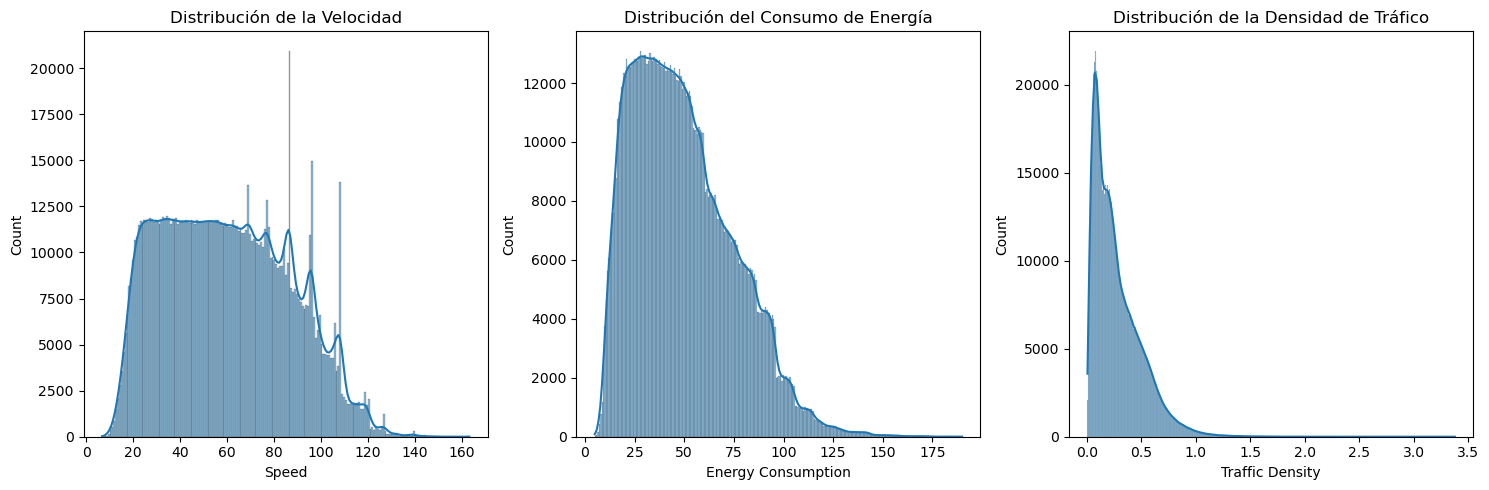

In [21]:
# Histograma de distribución de variables numéricas
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(df_fct['Speed'], ax=axes[0], kde=True)
axes[0].set_title('Distribución de la Velocidad')
sns.histplot(df_fct['Energy Consumption'], ax=axes[1], kde=True)
axes[1].set_title('Distribución del Consumo de Energía')
sns.histplot(df_fct['Traffic Density'], ax=axes[2], kde=True)
axes[2].set_title('Distribución de la Densidad de Tráfico')
plt.tight_layout()
plt.show()

## Análisis de los histogramas
### Distribución de la velocidad
* Bimodalidad: El histograma muestra una distribución bimodal con picos distintos. Esto sugiere que hay grupos principales de velocidades en el dataset.
* Pico principal: El pico principal está un rango de 40 a 80 unidades. Indica que la mayoría de los vehículos se desplazan a velocidades dentro de este rango.
* Picos secundarios: Hay distintos picos secundarios entre 80 y 120 unidades. Sugiere que hay grupos significativos de vehículos que se desplazan a velocidades más altas.
* Cola larga: El histograma tiene una cola larga hacia la derecha, indicando que hay algunos vehículos que se desplazan a muy altas velocidades.
* Posibles explicaciones: La bimodalidad puede deberse a diferentes tipos de vehículos, condiciones de tráfico, momentos del día, diferentes ubicaciones.
### Distribución en consumo de energía
* Sesgo a la derecha: El histograma muestra un sesgo a la derecha, co una cola larga hacia la derecha. Esto indica que la mayoría de los vehículos tienen un consumo de energía relativamente bajo, pero hay algunos vehículos con un consumo de energía muy alto.
* Pico principal: El pico principal se encuentra en un rango de 25 a 50 unidades. Sugiere que la mayoría de vehículos tienen un consumo de energía dentro de este rango.
* Posibles explicaciones: El sesgo hacia la derecha puede deberse a presencia de vehículos menos eficientes, presencia de vehículos que se desplazan a velocidades muy altas (Visto anteriormente) requieren más consumo de energía.
### Distribución en la densidad del tráfico
* Sesgo a la derecha: El histograma muestra un sesgo a la derecha muy pronunciado. Indica que la mayoría de registros tienen una densidad de tráfico relativamente baja, pero aún existen registros con densidad muy alta.
* Pico principal: El pico principal está muy cerca de 0, indicando que la mayoría de registros tienen una densidad muy baja.
* Posibles explicaciones: El sesgo puede deberse a las no pico con bajas densidades de tráfico, áreas con baja densidad de población o baja actividad comercial.
### Implicaciones y observaciones
* No normalidad: Ninguna de las tres variables muestra una distribución normal. Esto sugiere que se deben usar métodos no paramétricos para analizar estos datos.
* Presencia de valores atípicos: La presencia de colas largas sugiere la presencia de valores atípicos, se deben investigar estos valores para determinar si son errores o situaciones reales.

C:\Users\edgar\AppData\Local\Temp\ipykernel_20752\1921981413.py:17: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
D:\edgar\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


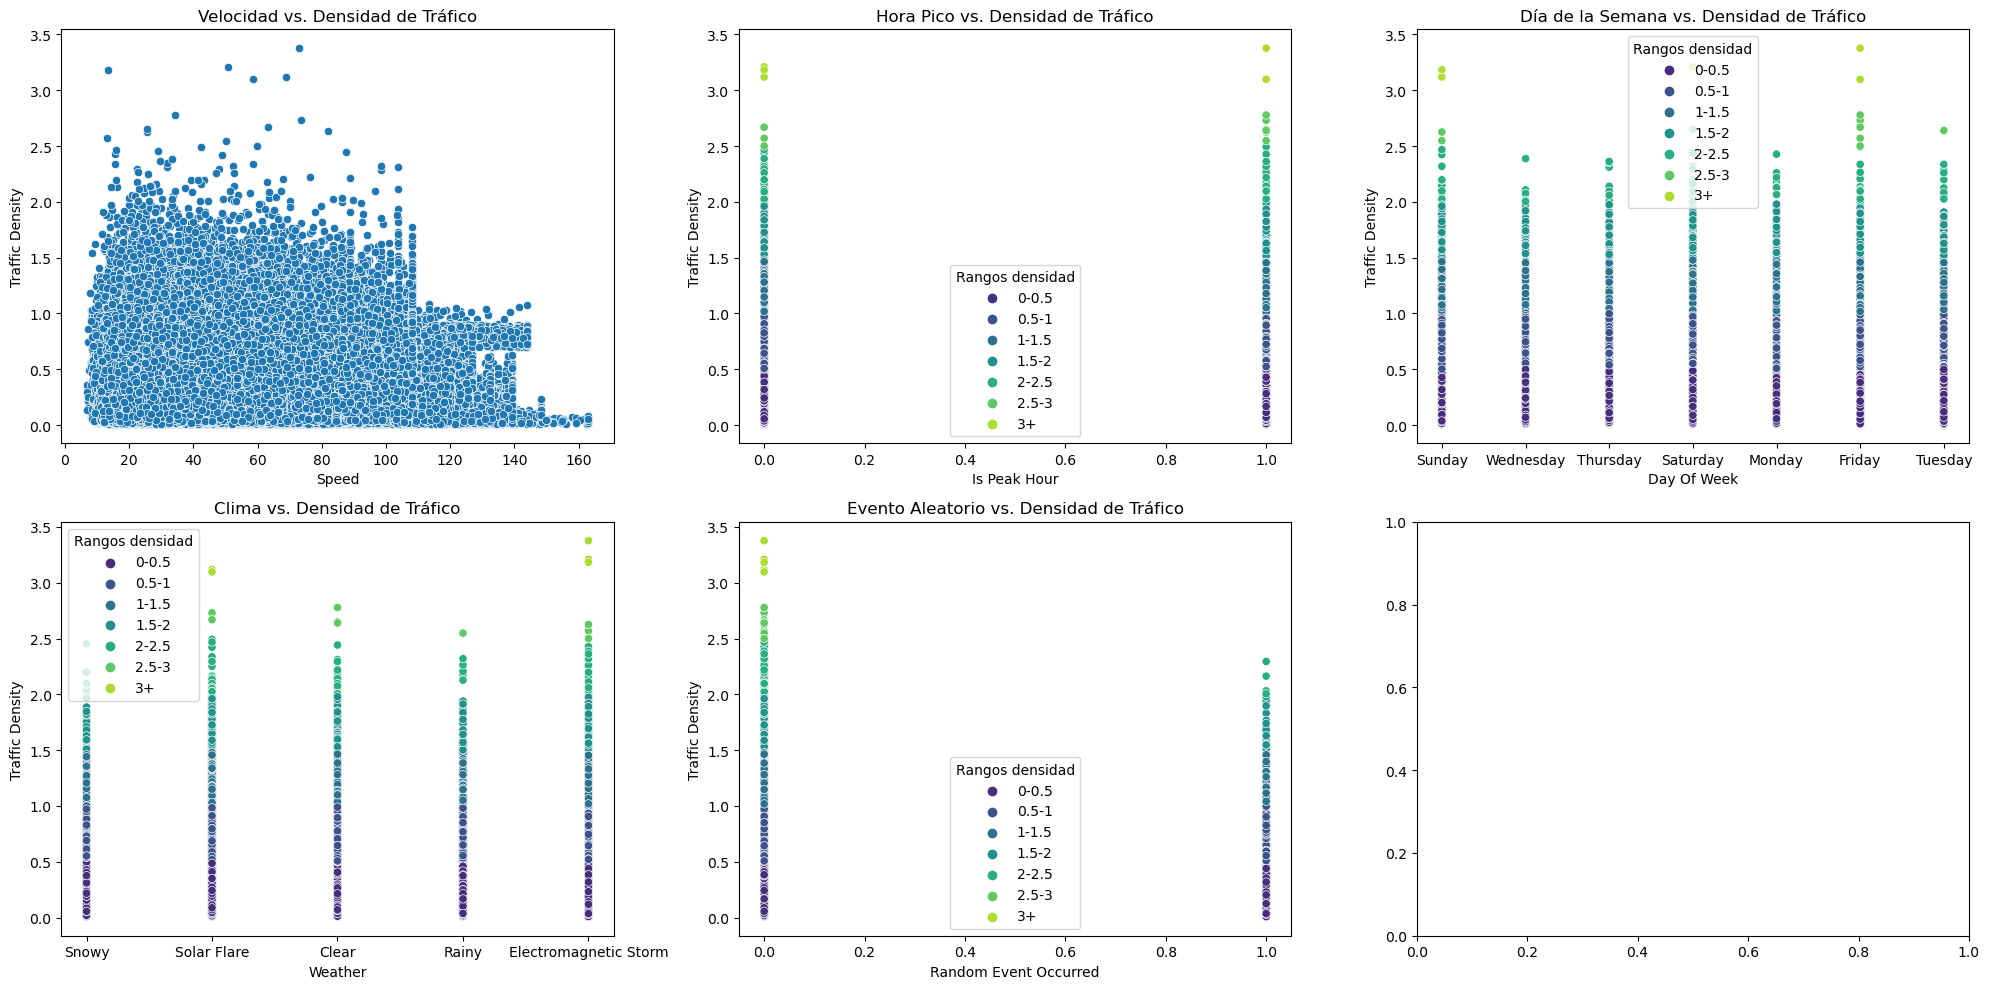

In [22]:
# Gráficos de dispersión entre variables
densidades = [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5]
labels = ['0-0.5', '0.5-1', '1-1.5', '1.5-2', '2-2.5', '2.5-3', '3+']
df_fct['Rangos densidad'] = pd.cut(df_fct['Traffic Density'], bins=densidades, labels=labels, right=False)

fig, axes = plt.subplots(2, 3, figsize=(20, 10))
sns.scatterplot(x='Speed', y='Traffic Density', data=df_fct, ax=axes[0, 0])
axes[0, 0].set_title('Velocidad vs. Densidad de Tráfico')
sns.scatterplot(x='Is Peak Hour', y='Traffic Density', data=df_fct, ax=axes[0, 1], hue='Rangos densidad', palette='viridis')
axes[0, 1].set_title('Hora Pico vs. Densidad de Tráfico')
sns.scatterplot(x='Day Of Week', y='Traffic Density', data=df_fct, ax=axes[0, 2], hue='Rangos densidad', palette='viridis')
axes[0, 2].set_title('Día de la Semana vs. Densidad de Tráfico')
sns.scatterplot(x='Weather', y='Traffic Density', data=df_fct, ax=axes[1, 0], hue='Rangos densidad', palette='viridis')
axes[1, 0].set_title('Clima vs. Densidad de Tráfico')
sns.scatterplot(x='Random Event Occurred', y='Traffic Density', data=df_fct, ax=axes[1, 1], hue='Rangos densidad', palette='viridis')
axes[1, 1].set_title('Evento Aleatorio vs. Densidad de Tráfico')
plt.tight_layout()
plt.show()

## Análisis de gráficos de dispersión
### Velocidad vs. Densidad de tráfico:
* Patrón no líneal: Se observa un patrón no lineal entre la velocidad y la densidad de tráfico.
* Alta densidad, baja velocidad: Cuando la densidad de tráfico es alta, la velocidad tiende a ser baja.
* Baja densidad, alta velocidad: Cuando la densidad de tráfico es baja, la velocidad a ser más variable.
* Posibles explicaciones: Este patrón sugiere que la congestión de tráfico afecta negativamente a la velocidad, pero en condiciones de baja congestión, otros factores pueden influir en la velocidad.
### Hora pico vs. Densidad de tráfico
* Dos grupos distintos: Se observan dos grupos, uno donde es hora pico (1) y otro donde no lo es (0).
* ¿Hora pico?: A pesar de verse bastante similares es algo notable que cuando es hora pico hay más valores superiores a 1, y cuando no lo es hay más valores inferiores a 1.
* Posibles explicaciones: Esto confirma que las horas pico se caracterizan por una mayor congestión en el tráfico.
### Día de la semana vs. Densidad de tráfico
* Variabilidad similar: Se observa una variabilidad similar en la densidad de tráfico en todos los días de la semana.
* Ligeras diferencias: Se pueden observar ligeras diferencias en la distribución de los puntos en los días de la semana, siendo lunes, martes, miércoles y jueves los días con menos picos de tráfico.
* Posibles explicaciones: Sugiere que la congestión de tráfico está presente en todos los días de la semana, pero con ligeras variaciones que podrían deberse a patrones de actividad específicos de cada día.
### Clima vs. Densidad de tráfico
* Variabilidad similar: Se observa una variabilidad similar en la densidad de tráfico en todas las condiciones climáticas.
* Ligeras diferencias: Se observan mayores registros de densidad de tráfico con llamarada solar y tormenta electromagnética.
* Posibles explicaciones: Esto sugiere que la congestión de tráfico es similar independientemente de las condiciones climáticas, pero con ligeras variaciones.
### Evento aleatorio vs. Densidad de tráfico
* Dos grupos distintos: Se observan dos grupos, uno donde ocurrió un evento aleatorio (1) y otro donde no (0).
* ¿Evento aleatorio?: No se ve una diferencia significativa entre sí, ocurre o no un evento aleatorio, aunque sorpresivamente cuando ocurre el rango de la densidad de tráfico es menor.

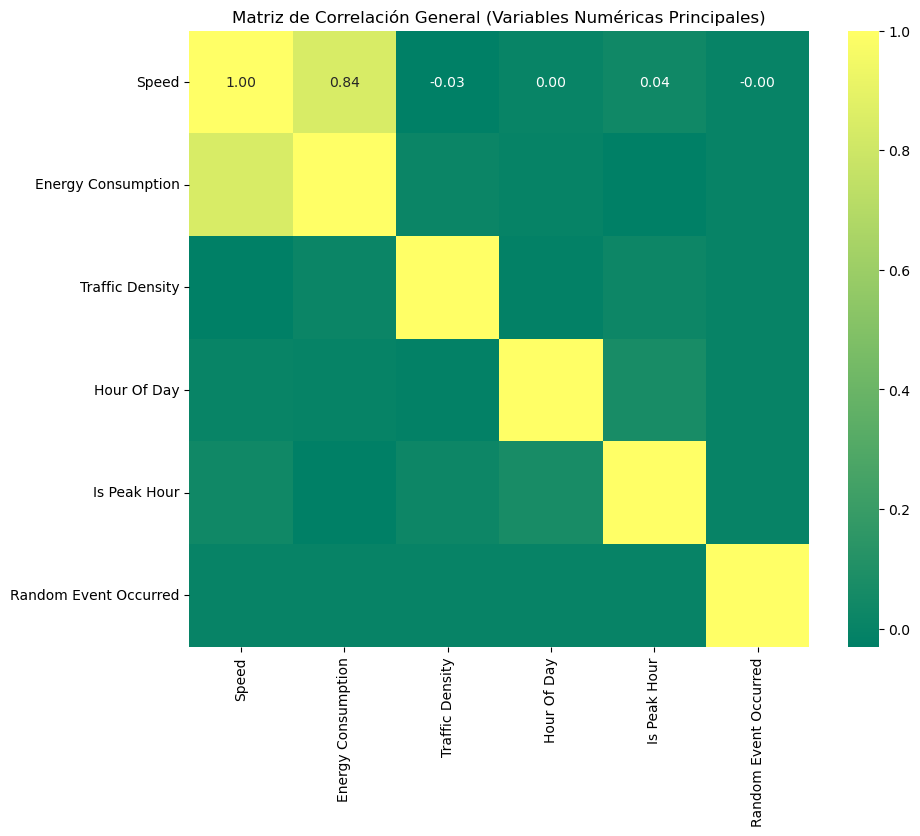

In [23]:
# Matriz de correlación general
columnas = ['Speed', 'Energy Consumption', 'Traffic Density', 'Hour Of Day', 'Is Peak Hour', 'Random Event Occurred']
plt.figure(figsize=(10, 8))
sns.heatmap(df_fct[columnas].corr(), annot=True, cmap='summer', fmt=".2f")
plt.title('Matriz de Correlación General (Variables Numéricas Principales)')
plt.show()

## Análisis de matriz de correlación general
### Alta correlación positiva
* Velocidad y consumo de energía (0.84): Es la relación más fuerte de la matriz. A medida que la velocidad aumenta, también lo hace el consumo de energía. Esto tiene sentido, para alcanzar y mantener una mayor velocidad se requiere más energía debido a la resistencia del aire, aceleración, fricción, etc. En un escenario de movilidad urbana, optimizar la velocidad sin aumentar el consumo de energía sería clave para mejorar la eficiencia del tráfico.
### Correlaciones bajas o cercanas a cero:
* Densidad de tráfico y velocidad (-0.03): No hay relación clara entre cantidad de vehículos en la vía y la velocidad promedio.
* Densidad de tráfico y hora del día (0.00): Sorprendentemente, la hora del día por sí sola no parece estar correlacionada con la densidad del tráfico. Sin embargo, cuando se considera junto con la variable "Hora pico", la correlación parece ser más significativa.
* Eventos aleatorios y otras variables (~0.00): Aunque eventos aleatorios como accidentes, desastres, cierres de vías, etc. pueden causar congestión, la matriz sugiere que en el dataset estos eventos no están significativamente correlacionados con otras variables numéricas.
## Conclusión
* Solo hay una relación fuerte: La única correlación alta en la matriz es la de velocidad vs. consumo de energía. Esto resalta la importancia de gestionar la eficiencia energética en el tráfico urbano.
* Las demás variables tienen correlaciones débiles o nulas: Esto indica que factores como densidad del tráfico, eventos aleatorios, clima no parecen tener relaciones complejas o lineales con las demás variables.

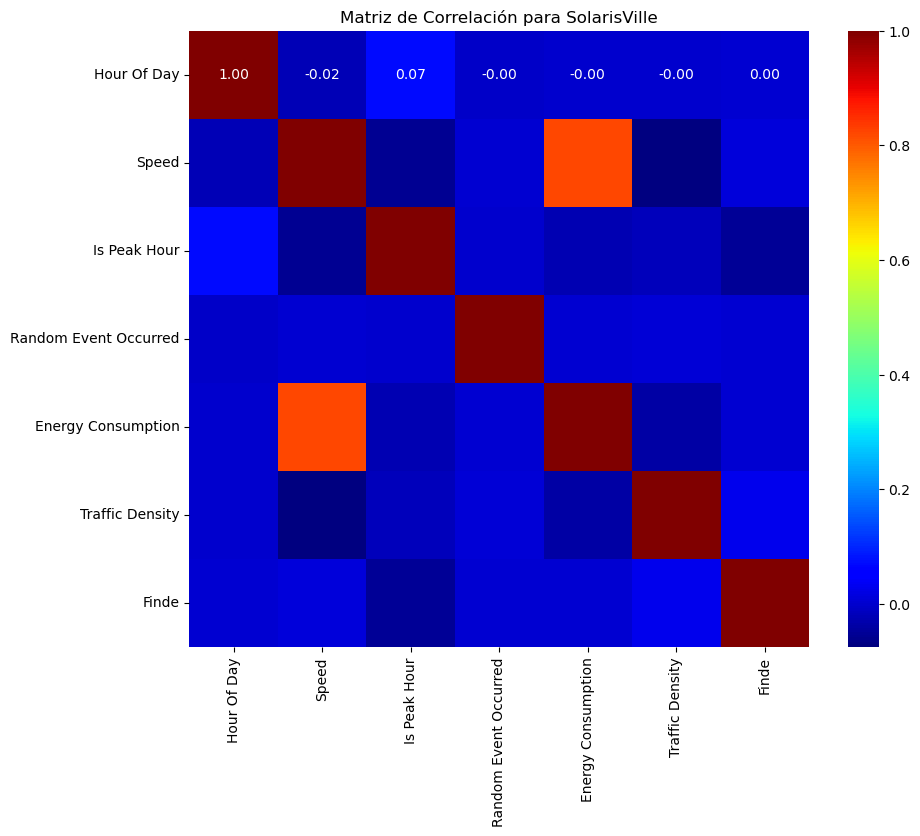

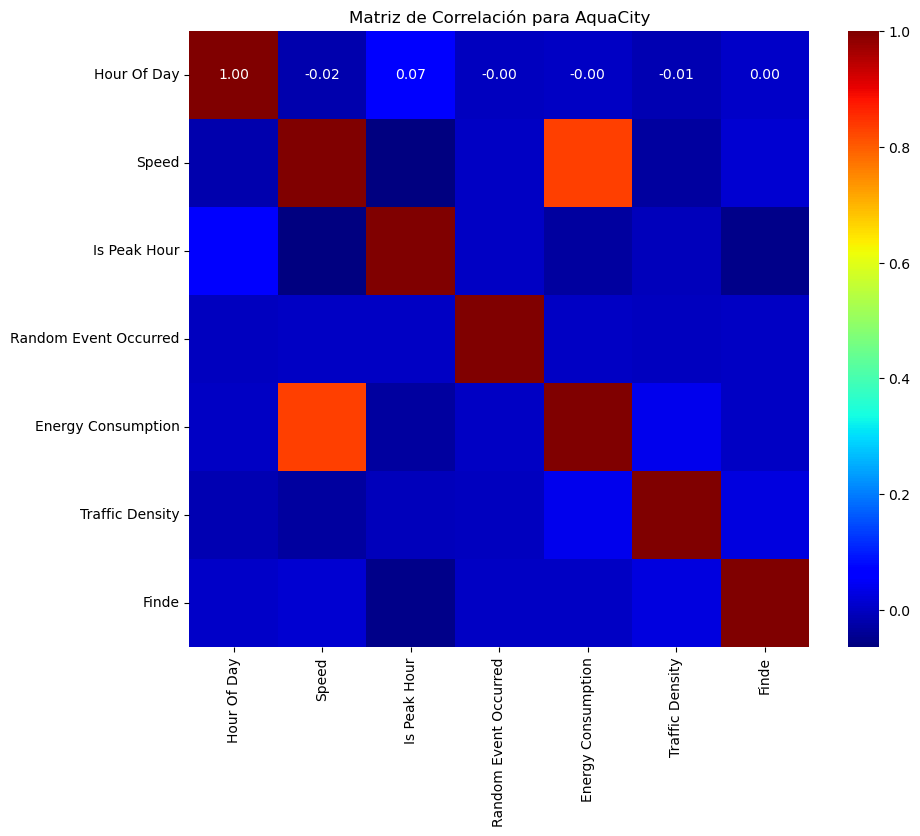

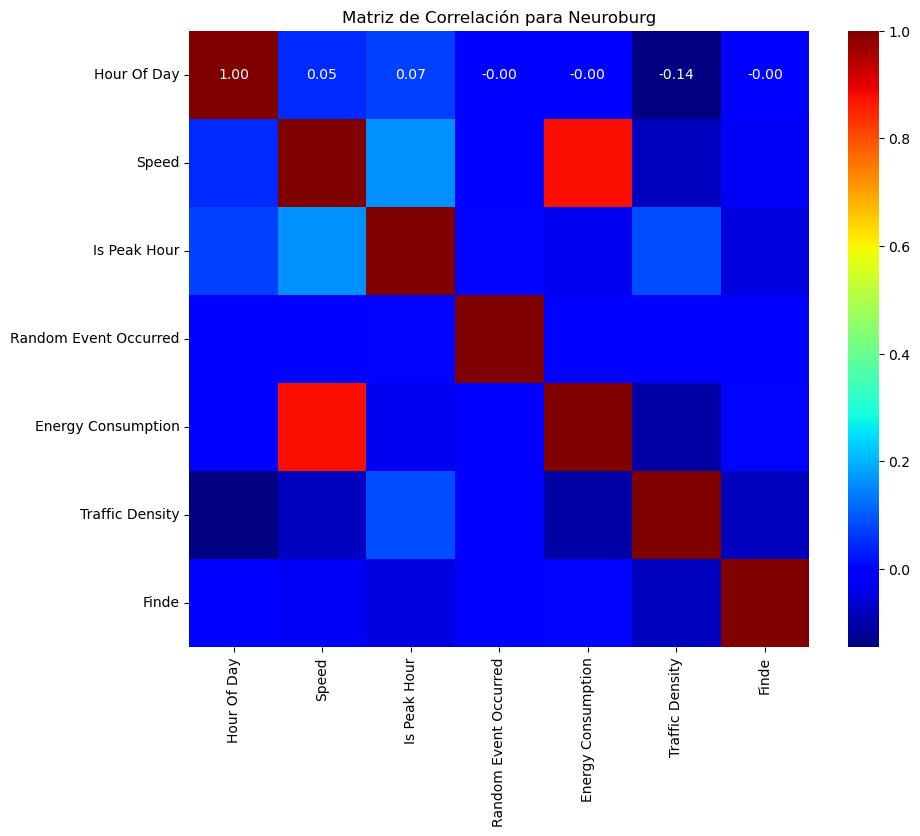

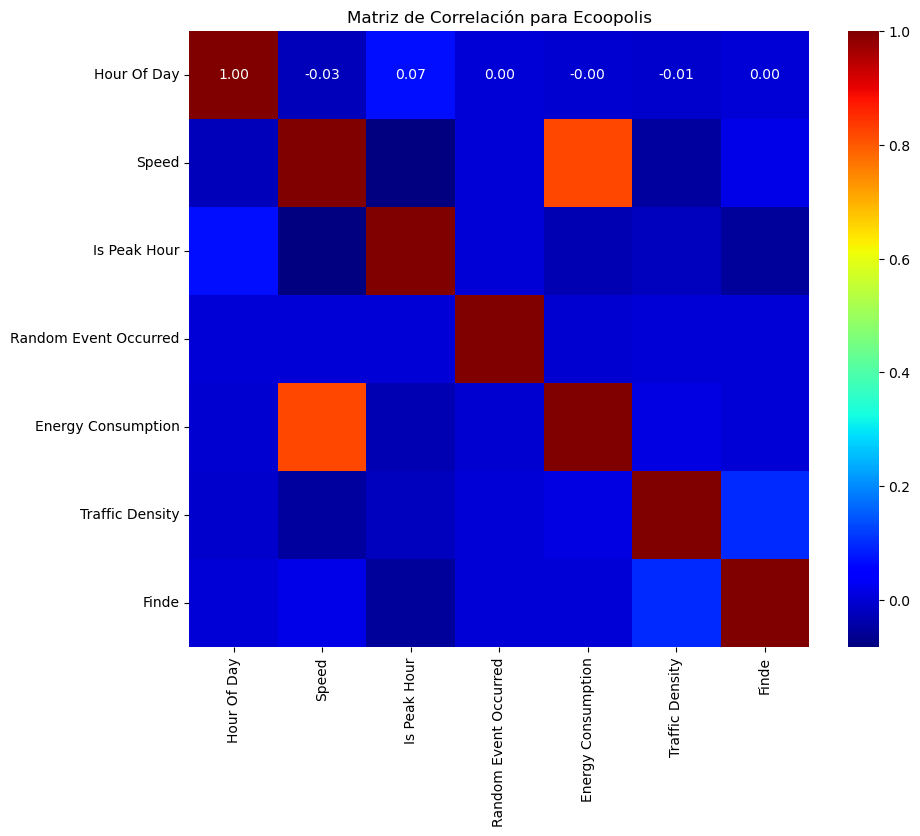

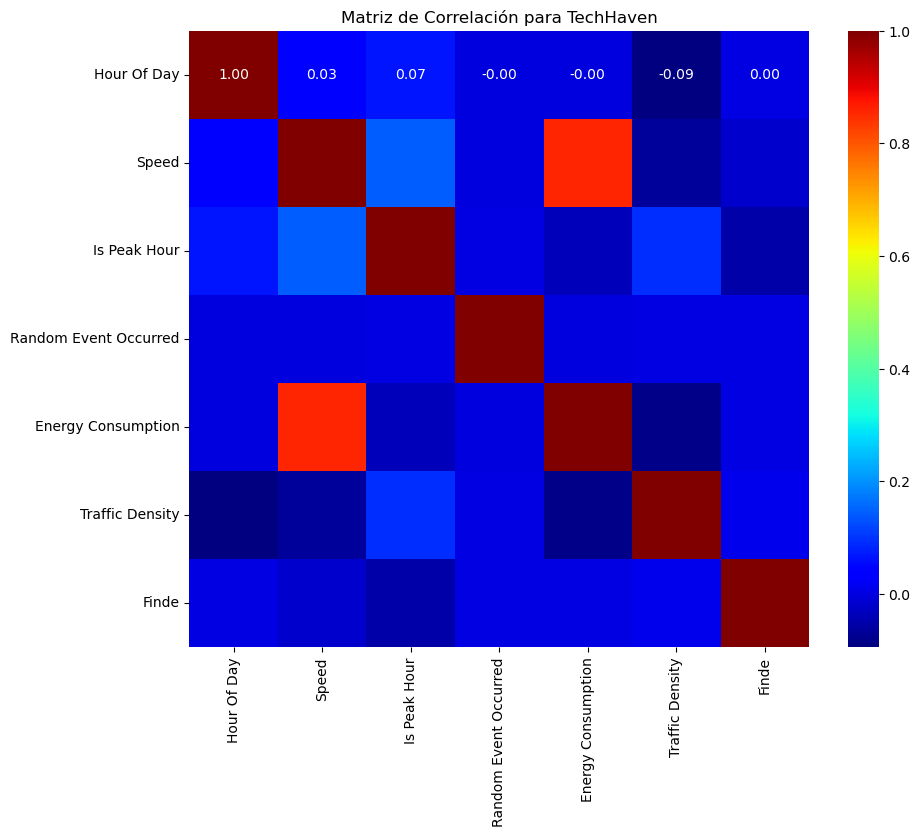

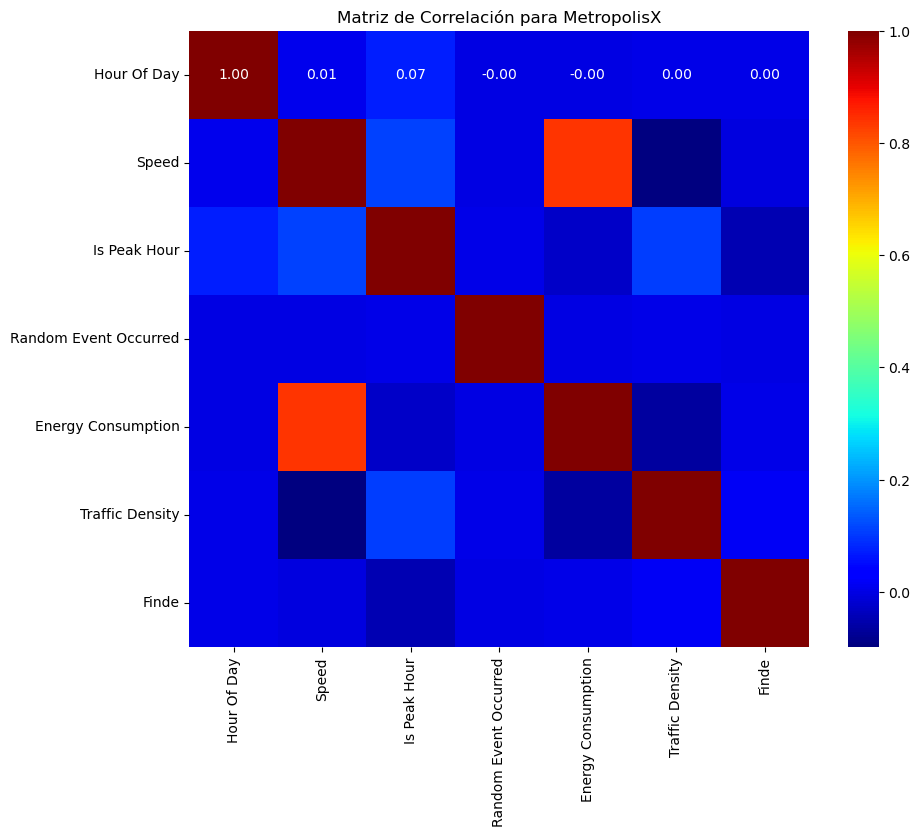

In [24]:
# Matriz de correación por ciudad
ciudades = df_fct['City'].unique()
for ciudad in ciudades:
    datos_ciudad = df_fct[df_fct['City'] == ciudad]

    plt.figure(figsize=(10, 8))
    sns.heatmap(datos_ciudad.corr(numeric_only=True), annot=True, cmap='jet', fmt=".2f")
    plt.title(f'Matriz de Correlación para {ciudad}')
    plt.show()

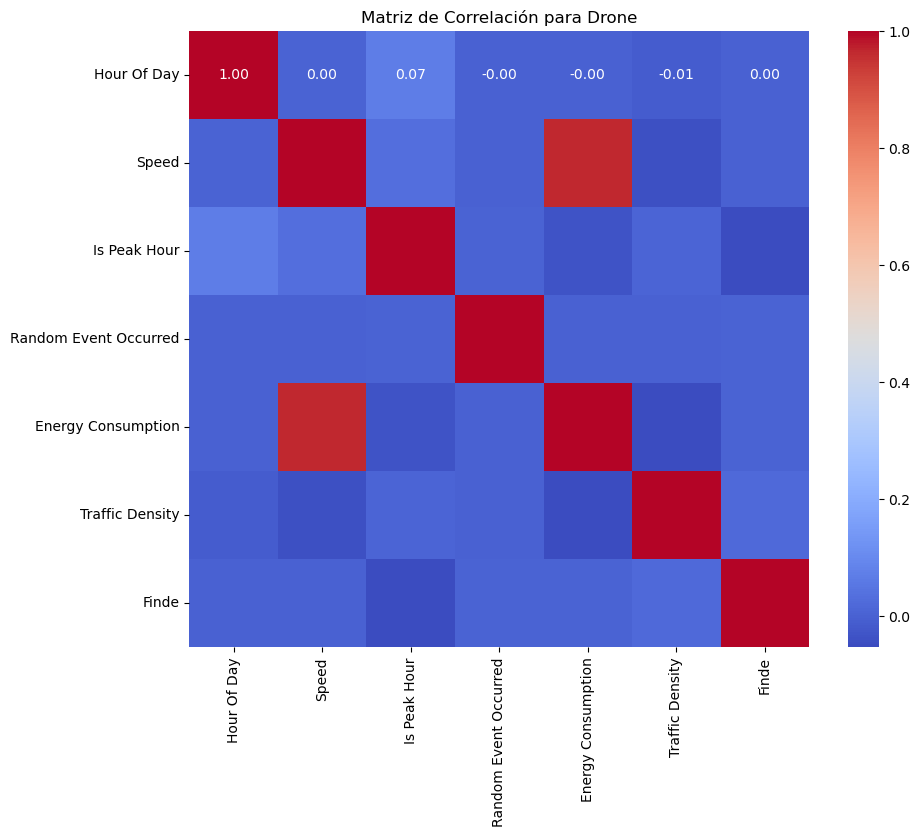

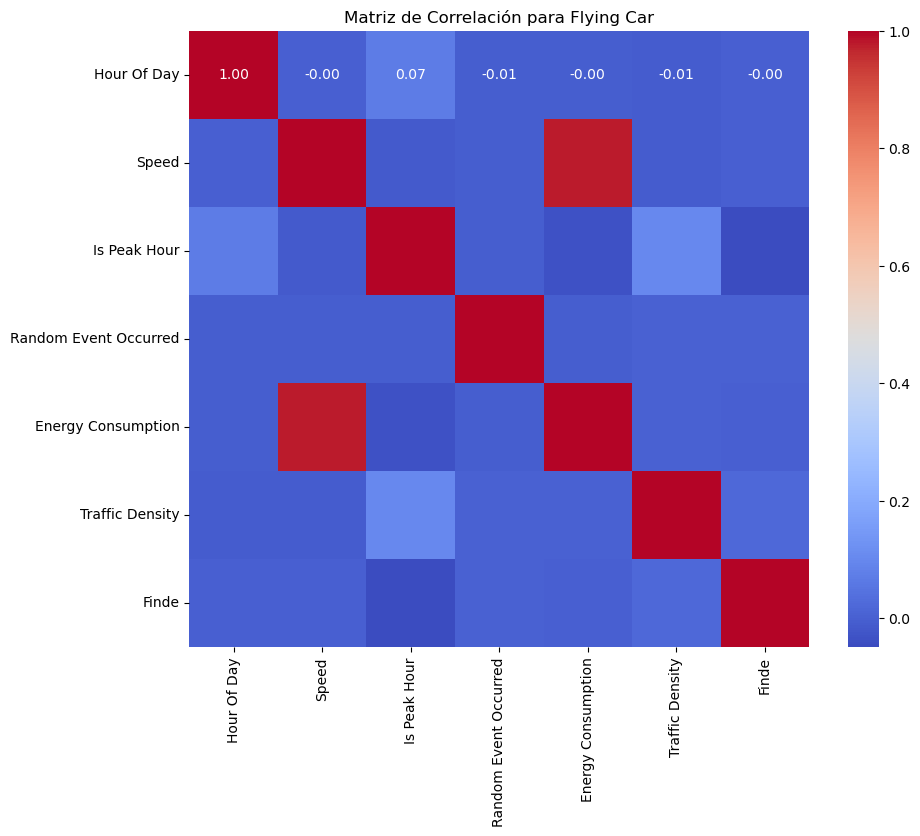

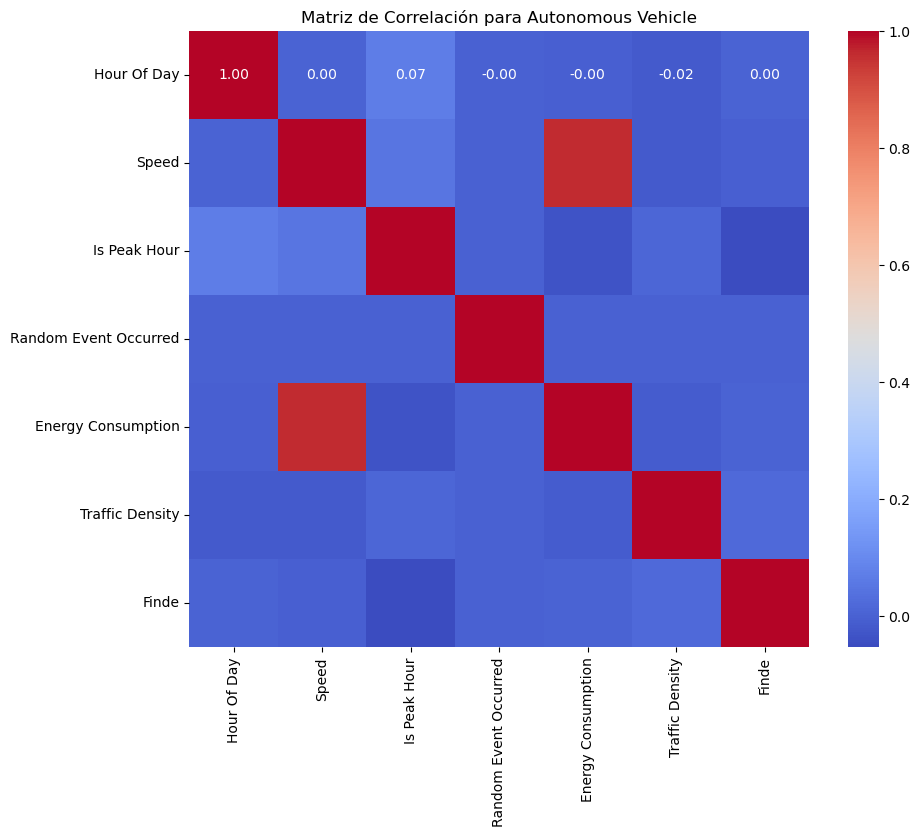

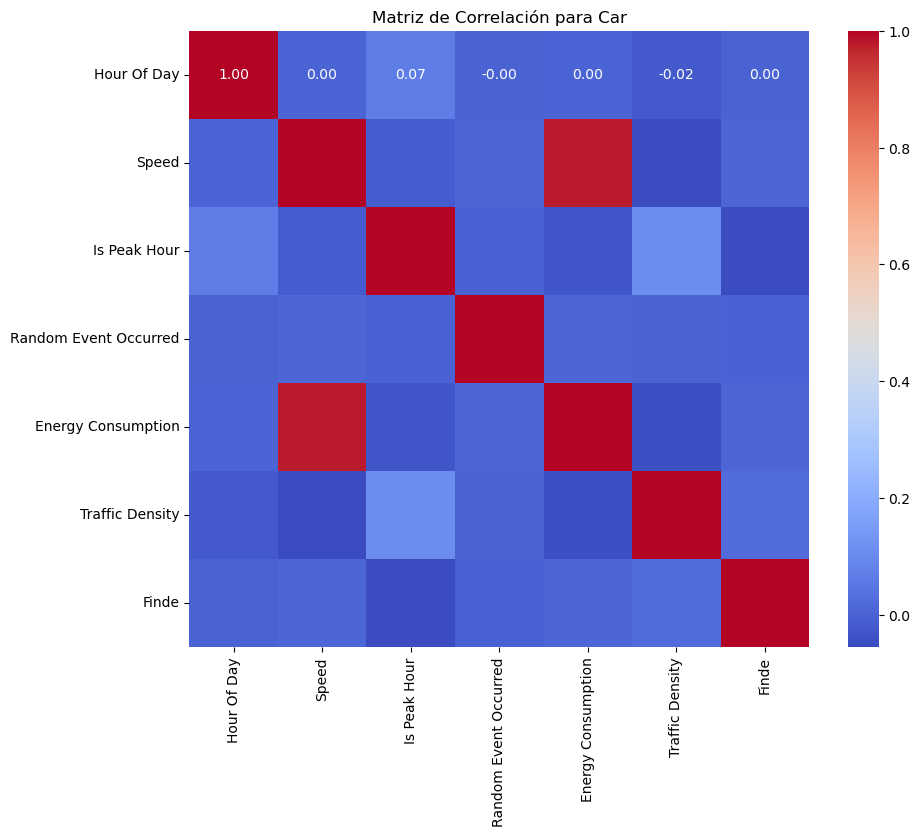

In [25]:
# Matriz de correlación por tipo de vehículo
tipos_vehiculos = df_fct['Vehicle Type'].unique()
for vehiculo in tipos_vehiculos:
    datos_vehiculos = df_fct[df_fct['Vehicle Type'] == vehiculo]

    plt.figure(figsize=(10, 8))
    sns.heatmap(datos_vehiculos.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f'Matriz de Correlación para {vehiculo}')
    plt.show()

## SQL

In [62]:
mydb = mysql.connector.connect(
    host="localhost",
    user="root",
    password=""
)

In [63]:
if mydb.is_connected():
    print("Connected successfully")
else:
    print("Failed to connect")

Connected successfully


In [76]:
mycursor = mydb.cursor(buffered=True)

mycursor.execute("SHOW DATABASES")

for x in mycursor:
    print(x)

('fct',)
('fpbd',)
('information_schema',)
('mysql',)
('performance_schema',)
('phpmyadmin',)
('test',)


In [65]:
mycursor.execute("DROP DATABASE IF EXISTS FCT")
if mydb.is_connected():
    mycursor = mydb.cursor(buffered=True)
    mycursor.execute("CREATE DATABASE FCT")
    mycursor.execute("SHOW DATABASES")
    for x in mycursor:
        print(x)

('fct',)
('fpbd',)
('information_schema',)
('mysql',)
('performance_schema',)
('phpmyadmin',)
('test',)


In [66]:
mydb = mysql.connector.connect(
    host="localhost",
    user="root",
    password="",
    database="fct"
)

In [90]:
def obtener_nombres_columnas(dataframe, nombre_tabla):
    columnas = ', '.join([f"`{col}`" for col in dataframe.columns])
    return columnas

In [91]:
def crear_tabla(nombre_tabla, nombres_columnas, tipos_columnas):
    try:
        cursor = mydb.cursor()

        # Construir la definición de las columnas (ignorando las dos últimas)
        definicion_columnas = ', '.join([f"`{col}` {tipo}" for col, tipo in zip(df_fct.columns[:-2], tipos_columnas)])

        consulta_sql = f"CREATE TABLE IF NOT EXISTS {nombre_tabla} ({definicion_columnas})"
        cursor.execute(consulta_sql)
        mydb.commit()
        print(f"Tabla '{nombre_tabla}' creada o ya existente.")

        # Verificar si la tabla fue creada
        cursor.execute(f"SHOW TABLES LIKE '{nombre_tabla}'")
        result = cursor.fetchone()
        if result:
            print(f"La tabla '{nombre_tabla}' fue creada exitosamente.")
        else:
            print(f"Error: La tabla '{nombre_tabla}' no fue creada.")

    except mysql.connector.Error as error:
        print(f"Error al crear la tabla: {error}")

    finally:
        if mydb.is_connected():
            cursor.close()

In [95]:
def insertar_datos(dataframe, nombre_tabla):
    try:
        cursor = mydb.cursor()

        columnas = ', '.join([f"`{col}`" for col in dataframe.columns[:-2]])
        valores_placeholder = ', '.join(['%s'] * len(dataframe.columns[:-2]))
        consulta_sql = f"INSERT INTO {nombre_tabla} ({columnas}) VALUES ({valores_placeholder})"

        for _, fila in dataframe.iterrows():
            valores = tuple(fila[:-2])  # Ignorar las dos últimas columnas
            cursor.execute(consulta_sql, valores)

        mydb.commit()
        print(f"Datos insertados en la tabla '{nombre_tabla}'.")

    except mysql.connector.Error as error:
        print(f"Error al insertar datos: {error}")

    finally:
        if mydb.is_connected():
            cursor.close()

In [96]:
def validar_datos(dataframe, nombre_tabla):
    try:
        cursor = mydb.cursor()

        columnas = ', '.join([f"`{col}`" for col in dataframe.columns[:-2]])
        consulta_sql = f"SELECT {columnas} FROM {nombre_tabla}"
        cursor.execute(consulta_sql)
        resultados = cursor.fetchall()

        df_sql = pd.DataFrame(resultados, columns=dataframe.columns[:-2])
        coincidencias = dataframe.iloc[:, :-2].merge(df_sql, how='left', indicator=True)
        no_coinciden = coincidencias[coincidencias['_merge'] == 'left_only']

        if no_coinciden.empty:
            print("Todos los datos del DataFrame existen en la tabla.")
        else:
            print("Los siguientes datos del DataFrame no existen en la tabla:")
            print(no_coinciden)

    except mysql.connector.Error as error:
        print(f"Error al validar datos: {error}")

    finally:
        if mydb.is_connected():
            cursor.close()

In [97]:
nombre_tabla = 'datos_trafico'
nombres_columnas = obtener_nombres_columnas(df_fct.iloc[:, :-2], nombre_tabla)
tipos_columnas = ['VARCHAR(255)', 'VARCHAR(255)', 'VARCHAR(255)', 'VARCHAR(255)', 'VARCHAR(255)', 'INT', 'FLOAT', 'INT', 'INT', 'FLOAT', 'FLOAT']
crear_tabla(nombre_tabla, nombres_columnas, tipos_columnas)
insertar_datos(df_fct, nombre_tabla)
validar_datos(df_fct, nombre_tabla)

Tabla 'datos_trafico' creada o ya existente.
La tabla 'datos_trafico' fue creada exitosamente.
Datos insertados en la tabla 'datos_trafico'.
Los siguientes datos del DataFrame no existen en la tabla:
                 City        Vehicle Type                Weather  \
1            AquaCity          Flying Car            Solar Flare   
2           Neuroburg  Autonomous Vehicle            Solar Flare   
16          Neuroburg  Autonomous Vehicle                  Snowy   
17        MetropolisX          Flying Car                  Clear   
23       SolarisVille  Autonomous Vehicle                  Snowy   
...               ...                 ...                    ...   
1219480   MetropolisX  Autonomous Vehicle  Electromagnetic Storm   
1219507   MetropolisX  Autonomous Vehicle                  Clear   
1219508  SolarisVille               Drone  Electromagnetic Storm   
1219522  SolarisVille               Drone                  Clear   
1219545     Neuroburg  Autonomous Vehicle           

In [81]:
mycursor.execute("SHOW TABLES")

for x in mycursor:
    print(x)

('datos_trafico',)
